You now have a pretty varied suite of clustering and clustering evaluation methods; we'd be remiss if we didn't give you the opportunity to try them out on some real data. So here we go!

There is a lot of information on runners and their performance for the Boston Marathon. Pick a year (post-2012 has more info) and do some clustering.

Specifically, use the tools at hand to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. Once you have a solution you like, write a data story, including visualizations, where you teach the reader something about the Boston Marathon based on your clusters. Write up your report, including your process from start to finish, in a Jupyter notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets.samples_generator import make_blobs
import warnings
from sklearn.cluster import MeanShift, estimate_bandwidth
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('BOSTON MARATHON 2014.csv', encoding = "ISO-8859-1", low_memory=False)

In [4]:
df.shape

(31984, 21)

In [5]:
dfs = df.sample(frac = 0.3)

In [6]:
dfs.shape

(9595, 21)

In [7]:
dfs.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
18302,53.18,"Korb, Jennifer",1206,137.13,F,42,238.60,20900,6710,NaN,...,17719,9.10,TX,166.38,26.35,114.67,108.57,USA,Kingwood,225.88
11225,46.95,"Reyes, John D.",272,118.47,M,55,209.47,12864,7139,NaN,...,9156,8.00,TX,143.48,23.65,99.03,93.88,USA,Fulshear,198.18
4731,42.28,"Peterson, Rodney A.",3784,120.28,M,36,227.32,5375,9639,NaN,...,14557,8.68,AZ,150.1,20.8,97.65,91.95,USA,Phoenix,213.75
15622,50.05,"Ransdell, Tara",3176,130.08,F,38,228.42,17858,5085,NaN,...,14872,8.72,AZ,158.58,24.65,109.05,103.02,USA,Glendale,215.68
3459,42.02,"Twomey, Nathan",1217,104.8,M,33,176.60,3919,1613,NaN,...,1707,6.75,CA,125.87,21.07,88.53,83.97,USA,San Diego,167.55


In [8]:
dfs.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [9]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9595 entries, 18302 to 22869
Data columns (total 21 columns):
10k          9595 non-null object
name         9595 non-null object
division     9595 non-null int64
25k          9595 non-null object
gender       9595 non-null object
age          9595 non-null int64
official     9595 non-null float64
bib          9595 non-null object
genderdiv    9595 non-null int64
ctz          348 non-null object
35k          9595 non-null object
overall      9595 non-null int64
pace         9595 non-null float64
state        8844 non-null object
30k          9595 non-null object
5k           9595 non-null object
half         9595 non-null object
20k          9595 non-null object
country      9595 non-null object
city         9595 non-null object
40k          9595 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 1.6+ MB


In [10]:
dfs.head(50)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
18302,53.18,"Korb, Jennifer",1206,137.13,F,42,238.60,20900,6710,NaN,...,17719,9.10,TX,166.38,26.35,114.67,108.57,USA,Kingwood,225.88
11225,46.95,"Reyes, John D.",272,118.47,M,55,209.47,12864,7139,NaN,...,9156,8.00,TX,143.48,23.65,99.03,93.88,USA,Fulshear,198.18
4731,42.28,"Peterson, Rodney A.",3784,120.28,M,36,227.32,5375,9639,NaN,...,14557,8.68,AZ,150.1,20.8,97.65,91.95,USA,Phoenix,213.75
15622,50.05,"Ransdell, Tara",3176,130.08,F,38,228.42,17858,5085,NaN,...,14872,8.72,AZ,158.58,24.65,109.05,103.02,USA,Glendale,215.68
3459,42.02,"Twomey, Nathan",1217,104.8,M,33,176.60,3919,1613,NaN,...,1707,6.75,CA,125.87,21.07,88.53,83.97,USA,San Diego,167.55
31457,56.12,"White, Peter",2114,142.17,M,44,268.82,35343,13476,GBR,...,23268,10.27,NaN,176.6,28.35,118.05,111.77,IRL,Belfast,252.58
17122,50.47,"Hazard, Eleanor",4489,136.43,F,37,258.17,19583,8878,NaN,...,21527,9.85,VT,170.27,25.03,111.3,104.98,USA,Burlington,241.6
26473,67.75,"Lucier, Dani H.",6322,181.47,F,24,330.18,29871,13041,NaN,...,29527,12.60,MA,225.23,33.5,147.58,139.57,USA,Brookline,312.68
7351,49.87,"Abbey, Timothy",1859,128.15,M,46,228.38,8380,9779,NaN,...,14860,8.72,PA,156.5,24.78,107.38,101.68,USA,Elizabethtown,215.47
29982,69.83,"Hippert, David",5799,200.7,M,31,361.83,33666,17163,NaN,...,31000,13.82,NH,248.7,33.67,164.58,155.52,USA,Manchester,344.58


We're analyzing what effect if any does age have on performace between all age groups.
Therefore, name, bib, ctz, overall, state, country, and city can be dropped.

In [11]:
dfs.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [12]:
#dfc = df.drop(['name', 'bib', 'ctz', 'overall', 'state', 'country', 'city'], axis = 1)
dfc=dfs

In [13]:
dfc.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
18302,53.18,"Korb, Jennifer",1206,137.13,F,42,238.60,20900,6710,NaN,...,17719,9.10,TX,166.38,26.35,114.67,108.57,USA,Kingwood,225.88
11225,46.95,"Reyes, John D.",272,118.47,M,55,209.47,12864,7139,NaN,...,9156,8.00,TX,143.48,23.65,99.03,93.88,USA,Fulshear,198.18
4731,42.28,"Peterson, Rodney A.",3784,120.28,M,36,227.32,5375,9639,NaN,...,14557,8.68,AZ,150.1,20.8,97.65,91.95,USA,Phoenix,213.75
15622,50.05,"Ransdell, Tara",3176,130.08,F,38,228.42,17858,5085,NaN,...,14872,8.72,AZ,158.58,24.65,109.05,103.02,USA,Glendale,215.68
3459,42.02,"Twomey, Nathan",1217,104.8,M,33,176.60,3919,1613,NaN,...,1707,6.75,CA,125.87,21.07,88.53,83.97,USA,San Diego,167.55


In [14]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9595 entries, 18302 to 22869
Data columns (total 21 columns):
10k          9595 non-null object
name         9595 non-null object
division     9595 non-null int64
25k          9595 non-null object
gender       9595 non-null object
age          9595 non-null int64
official     9595 non-null float64
bib          9595 non-null object
genderdiv    9595 non-null int64
ctz          348 non-null object
35k          9595 non-null object
overall      9595 non-null int64
pace         9595 non-null float64
state        8844 non-null object
30k          9595 non-null object
5k           9595 non-null object
half         9595 non-null object
20k          9595 non-null object
country      9595 non-null object
city         9595 non-null object
40k          9595 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 1.6+ MB


In [15]:
dfc.isnull().sum()

10k             0
name            0
division        0
25k             0
gender          0
age             0
official        0
bib             0
genderdiv       0
ctz          9247
35k             0
overall         0
pace            0
state         751
30k             0
5k              0
half            0
20k             0
country         0
city            0
40k             0
dtype: int64

In [16]:
dfc.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [17]:
dfc.corr()

,division,age,official,genderdiv,overall,pace
division,1.000000,-0.576260,0.522591,0.478401,0.522206,0.522852
age,-0.576260,1.000000,0.160311,0.299700,0.194494,0.160437
official,0.522591,0.160311,1.000000,0.878987,0.954785,0.999909
genderdiv,0.478401,0.299700,0.878987,1.000000,0.909033,0.879349
overall,0.522206,0.194494,0.954785,0.909033,1.000000,0.955301
pace,0.522852,0.160437,0.999909,0.879349,0.955301,1.000000


In [18]:
dfc['10k'] = dfc['10k'].convert_objects(convert_numeric=True)

In [19]:
dfc['25k'] = dfc['25k'].convert_objects(convert_numeric=True)
dfc['35k'] = dfc['35k'].convert_objects(convert_numeric=True)
dfc['30k'] = dfc['30k'].convert_objects(convert_numeric=True)
dfc['5k'] = dfc['5k'].convert_objects(convert_numeric=True)


In [20]:
dfc['half'] = dfc['half'].convert_objects(convert_numeric=True)
dfc['20k'] = dfc['20k'].convert_objects(convert_numeric=True)
dfc['40k'] = dfc['40k'].convert_objects(convert_numeric=True)

In [21]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9595 entries, 18302 to 22869
Data columns (total 21 columns):
10k          9580 non-null float64
name         9595 non-null object
division     9595 non-null int64
25k          9538 non-null float64
gender       9595 non-null object
age          9595 non-null int64
official     9595 non-null float64
bib          9595 non-null object
genderdiv    9595 non-null int64
ctz          348 non-null object
35k          9581 non-null float64
overall      9595 non-null int64
pace         9595 non-null float64
state        8844 non-null object
30k          9582 non-null float64
5k           9583 non-null float64
half         9576 non-null float64
20k          9580 non-null float64
country      9595 non-null object
city         9595 non-null object
40k          9578 non-null float64
dtypes: float64(10), int64(4), object(7)
memory usage: 1.6+ MB


In [22]:
dfc = dfc.drop('ctz', axis =1)


In [23]:
dfc = dfc.drop('bib', axis = 1)

In [24]:
dfc.country.value_counts()

USA    8197
CAN     647
GBR     106
MEX      67
ITA      62
JPN      52
GER      45
FRA      41
AUS      34
IRL      31
ESP      25
NED      22
DEN      19
SUI      19
KOR      18
SWE      17
HKG      16
BRA      15
COL      12
CHN      10
BEL       9
ISL       9
NOR       7
GUA       7
CHI       6
VEN       6
AUT       6
SIN       6
NZL       5
KEN       5
       ... 
IND       4
ARG       4
BER       4
LUX       3
RSA       3
GRE       3
FIN       3
POR       3
POL       3
ISR       2
ROU       2
PHI       2
RUS       2
UKR       2
URU       1
ETH       1
PER       1
THA       1
DOM       1
ECU       1
ESA       1
SVK       1
BAR       1
EGY       1
CZE       1
TRI       1
MAR       1
BLR       1
BAH       1
MAS       1
Name: country, Length: 64, dtype: int64

In [25]:
dfc["is_male"] = pd.get_dummies(dfc.gender, drop_first=True)

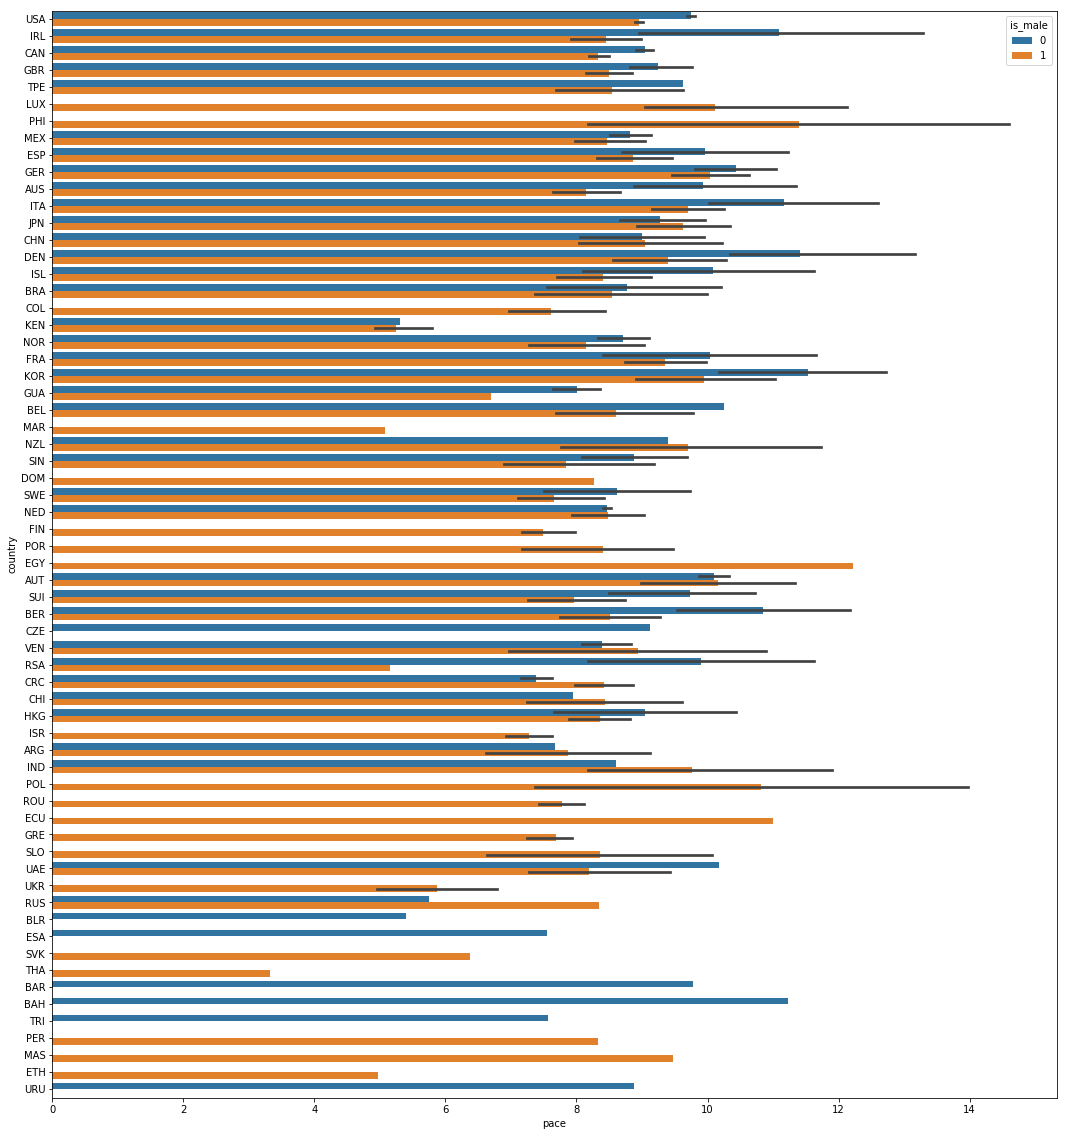

In [26]:
plt.figure(figsize=(18,20))
sns.barplot(y= dfc.country, x = dfc.pace, hue = dfc.is_male, )

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [28]:
dfc.head(10)

,10k,name,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,is_male
18302,53.18,"Korb, Jennifer",1206,137.13,F,42,238.60,6710,196.48,17719,9.10,TX,166.38,26.35,114.67,108.57,USA,Kingwood,225.88,0
11225,46.95,"Reyes, John D.",272,118.47,M,55,209.47,7139,172.32,9156,8.00,TX,143.48,23.65,99.03,93.88,USA,Fulshear,198.18,1
4731,42.28,"Peterson, Rodney A.",3784,120.28,M,36,227.32,9639,180.57,14557,8.68,AZ,150.10,20.80,97.65,91.95,USA,Phoenix,213.75,1
15622,50.05,"Ransdell, Tara",3176,130.08,F,38,228.42,5085,187.63,14872,8.72,AZ,158.58,24.65,109.05,103.02,USA,Glendale,215.68,0
3459,42.02,"Twomey, Nathan",1217,104.80,M,33,176.60,1613,146.78,1707,6.75,CA,125.87,21.07,88.53,83.97,USA,San Diego,167.55,1
31457,56.12,"White, Peter",2114,142.17,M,44,268.82,13476,215.03,23268,10.27,NaN,176.60,28.35,118.05,111.77,IRL,Belfast,252.58,1
17122,50.47,"Hazard, Eleanor",4489,136.43,F,37,258.17,8878,205.55,21527,9.85,VT,170.27,25.03,111.30,104.98,USA,Burlington,241.60,0
26473,67.75,"Lucier, Dani H.",6322,181.47,F,24,330.18,13041,269.25,29527,12.60,MA,225.23,33.50,147.58,139.57,USA,Brookline,312.68,0
7351,49.87,"Abbey, Timothy",1859,128.15,M,46,228.38,9779,186.80,14860,8.72,PA,156.50,24.78,107.38,101.68,USA,Elizabethtown,215.47,1
29982,69.83,"Hippert, David",5799,200.70,M,31,361.83,17163,298.43,31000,13.82,NH,248.70,33.67,164.58,155.52,USA,Manchester,344.58,1


In [29]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9595 entries, 18302 to 22869
Data columns (total 20 columns):
10k          9580 non-null float64
name         9595 non-null object
division     9595 non-null int64
25k          9538 non-null float64
gender       9595 non-null object
age          9595 non-null int64
official     9595 non-null float64
genderdiv    9595 non-null int64
35k          9581 non-null float64
overall      9595 non-null int64
pace         9595 non-null float64
state        8844 non-null object
30k          9582 non-null float64
5k           9583 non-null float64
half         9576 non-null float64
20k          9580 non-null float64
country      9595 non-null object
city         9595 non-null object
40k          9578 non-null float64
is_male      9595 non-null uint8
dtypes: float64(10), int64(4), object(5), uint8(1)
memory usage: 1.8+ MB


In [30]:
dfc.head(20)

,10k,name,division,25k,gender,age,official,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k,is_male
18302,53.18,"Korb, Jennifer",1206,137.13,F,42,238.60,6710,196.48,17719,9.10,TX,166.38,26.35,114.67,108.57,USA,Kingwood,225.88,0
11225,46.95,"Reyes, John D.",272,118.47,M,55,209.47,7139,172.32,9156,8.00,TX,143.48,23.65,99.03,93.88,USA,Fulshear,198.18,1
4731,42.28,"Peterson, Rodney A.",3784,120.28,M,36,227.32,9639,180.57,14557,8.68,AZ,150.10,20.80,97.65,91.95,USA,Phoenix,213.75,1
15622,50.05,"Ransdell, Tara",3176,130.08,F,38,228.42,5085,187.63,14872,8.72,AZ,158.58,24.65,109.05,103.02,USA,Glendale,215.68,0
3459,42.02,"Twomey, Nathan",1217,104.80,M,33,176.60,1613,146.78,1707,6.75,CA,125.87,21.07,88.53,83.97,USA,San Diego,167.55,1
31457,56.12,"White, Peter",2114,142.17,M,44,268.82,13476,215.03,23268,10.27,NaN,176.60,28.35,118.05,111.77,IRL,Belfast,252.58,1
17122,50.47,"Hazard, Eleanor",4489,136.43,F,37,258.17,8878,205.55,21527,9.85,VT,170.27,25.03,111.30,104.98,USA,Burlington,241.60,0
26473,67.75,"Lucier, Dani H.",6322,181.47,F,24,330.18,13041,269.25,29527,12.60,MA,225.23,33.50,147.58,139.57,USA,Brookline,312.68,0
7351,49.87,"Abbey, Timothy",1859,128.15,M,46,228.38,9779,186.80,14860,8.72,PA,156.50,24.78,107.38,101.68,USA,Elizabethtown,215.47,1
29982,69.83,"Hippert, David",5799,200.70,M,31,361.83,17163,298.43,31000,13.82,NH,248.70,33.67,164.58,155.52,USA,Manchester,344.58,1


In [25]:
#dfc = dfc.dropna()

In [32]:
dfc.corr()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,is_male
10k,1.000000,0.472723,0.971753,0.167465,0.924910,0.798702,0.941939,0.900917,0.924994,0.958401,0.987829,0.983442,0.985032,0.927935,-0.266796
division,0.472723,1.000000,0.501787,-0.576260,0.522591,0.478401,0.517957,0.522206,0.522852,0.509270,0.467032,0.486829,0.485591,0.524971,-0.124102
25k,0.971753,0.501787,1.000000,0.156094,0.967593,0.825359,0.983703,0.928142,0.967579,0.995792,0.943304,0.995891,0.994996,0.971442,-0.264550
age,0.167465,-0.576260,0.156094,1.000000,0.160311,0.299700,0.151289,0.194494,0.160437,0.151094,0.157279,0.161356,0.162638,0.155310,0.210074
official,0.924910,0.522591,0.967593,0.160311,1.000000,0.878987,0.993556,0.954785,0.999909,0.981453,0.893950,0.957480,0.955374,0.999403,-0.200124
genderdiv,0.798702,0.478401,0.825359,0.299700,0.878987,1.000000,0.856636,0.909033,0.879349,0.837397,0.780944,0.813572,0.812725,0.874890,0.171671
35k,0.941939,0.517957,0.983703,0.151289,0.993556,0.856636,1.000000,0.943551,0.993564,0.993518,0.912003,0.974216,0.972431,0.995744,-0.225763
overall,0.900917,0.522206,0.928142,0.194494,0.954785,0.909033,0.943551,1.000000,0.955301,0.932145,0.879618,0.915008,0.915505,0.954553,-0.242254
pace,0.924994,0.522852,0.967579,0.160437,0.999909,0.879349,0.993564,0.955301,1.000000,0.981428,0.894129,0.957357,0.955389,0.999405,-0.200581
30k,0.958401,0.509270,0.995792,0.151094,0.981453,0.837397,0.993518,0.932145,0.981428,1.000000,0.927792,0.988283,0.986849,0.984461,-0.244884


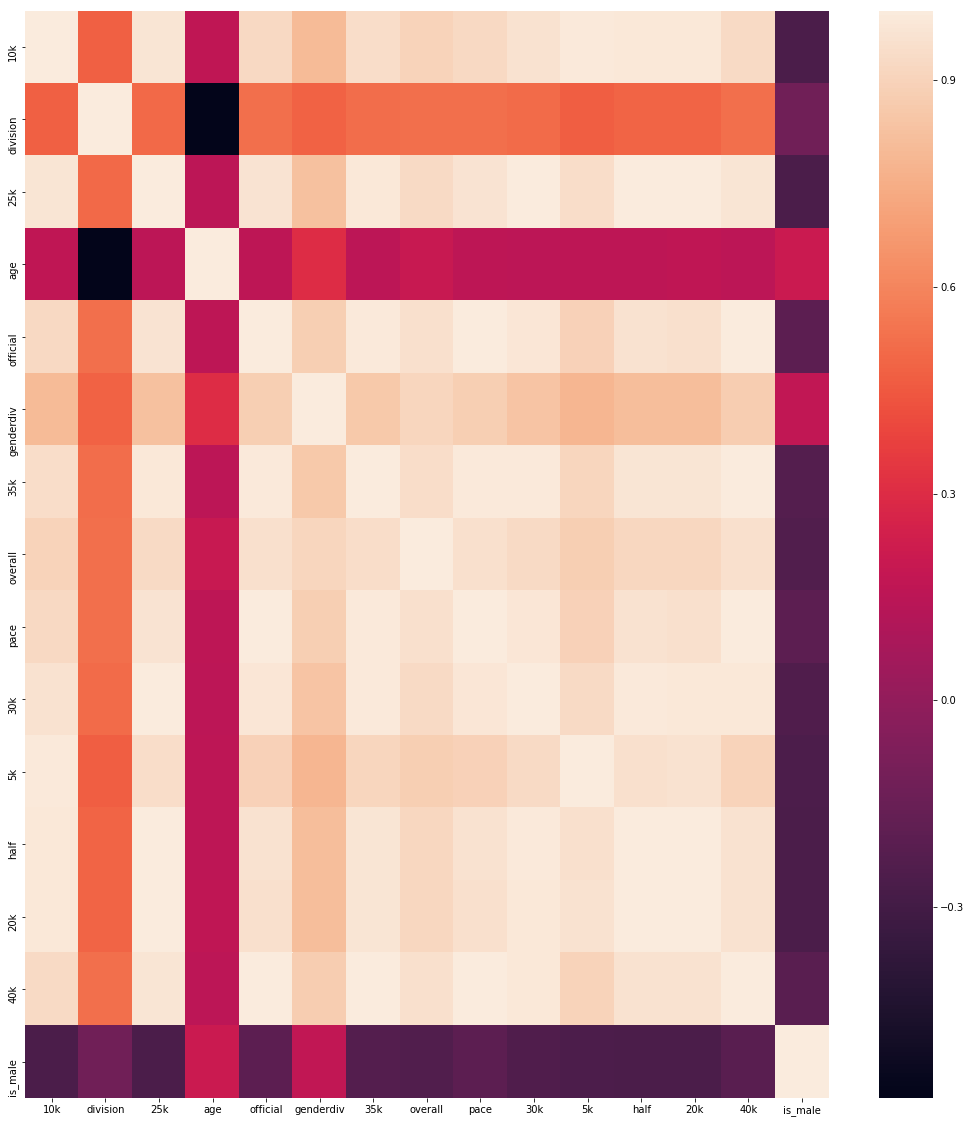

In [33]:
plt.figure(figsize=(18,20))
sns.heatmap(dfc.corr())

In [34]:
cor=dfc.corr()
cor_target = abs(cor["pace"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

10k          0.924994
division     0.522852
25k          0.967579
official     0.999909
genderdiv    0.879349
35k          0.993564
overall      0.955301
pace         1.000000
30k          0.981428
5k           0.894129
half         0.957357
20k          0.955389
40k          0.999405
Name: pace, dtype: float64

In [35]:
cor=dfc.corr()
cor_target = abs(cor["division"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

division    1.000000
25k         0.501787
age         0.576260
official    0.522591
35k         0.517957
overall     0.522206
pace        0.522852
30k         0.509270
40k         0.524971
Name: division, dtype: float64

In [36]:
dfc.isnull().sum()

10k           15
name           0
division       0
25k           57
gender         0
age            0
official       0
genderdiv      0
35k           14
overall        0
pace           0
state        751
30k           13
5k            12
half          19
20k           15
country        0
city           0
40k           17
is_male        0
dtype: int64

In [37]:
dfc= dfc.dropna()

In [38]:
dfc.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official',
       'genderdiv', '35k', 'overall', 'pace', 'state', '30k', '5k', 'half',
       '20k', 'country', 'city', '40k', 'is_male'],
      dtype='object')

In [39]:
from sklearn.model_selection import train_test_split

X= dfc[['25k', 'age', 'official', 'genderdiv', '35k', 'overall', 'pace',
        '30k', '5k', 'half', '20k', '40k', 'is_male']]
y= dfc.division

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



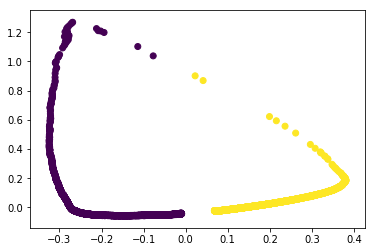

Comparing k-means clusters against the data:
division  1     2     3     4     5     6     7     8     9     10    ...  \
row_0                                                                 ...   
0            3     0     3     0     3     3     5     5     2     1  ...   
1            1     3     1     2     3     0     1     3     1     3  ...   

division  6914  6921  6928  6932  6935  6937  6947  6949  6952  6977  
row_0                                                                 
0            0     0     0     0     0     0     0     0     0     0  
1            1     1     1     1     1     1     1     1     1     1  

[2 rows x 4398 columns]


In [40]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

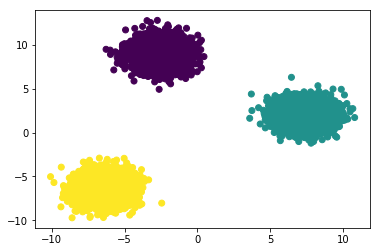

In [41]:
X, y = make_blobs(
    n_samples=10000,
    cluster_std=1,
    n_features=7,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


In [42]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=100)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 4


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as mse

In [44]:
print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)


# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


The number of observations in training set is 7001
The number of observations in test set is 1751
R-squared of the model in the training set is: 0.8106287918163674
-----Test set statistics-----
R-squared of the model in the test set is: 0.8204951148421235
Mean absolute error of the prediction is: 560.9067229307881
Mean squared error of the prediction is: 548635.4267776556
Mean absolute percentage error of the prediction is: 323.76550278070255
